#Punto 2

En una planta industrial se está considerando la introducción de un vehículo inteligente que sea capaz de trasladarse de forma autónoma a través de las instalaciones y de transportar los productos desde el área de almacenamiento central hasta las diferentes zonas de manufactura. La empresa tiene tres áreas de manufactura y cada producto se encuentra empacado en un contenedor específico que identifica el área a la que pertenece.

#Punto 3
Aplicando el pensamiento lógico y analítico, modela la situación planteada anteriormente y determina, a partir de tus conocimientos actuales, cuáles serían los componentes de aprendizaje automático que consideras necesarios incluir para implementar la solución.


Los componentes que veo necesarios para la implementacion a la solucion del problema son 


*   Utilizar aprendizaje suprevisado 
*   Algoritmo de tipo clasificacion 
*   Utlizar imaganes con etiquetas para el entramiento
*   utlizar algoritmo para disminuir el tamaño de las imagenes 
*   Utilizar 20 de test y 80 de entramiento 
*   Limpieza de datos 



#Punto 5 
Se conoce que un vehículo como el descrito puede tener una o varias cámaras incorporadas, cuya resolución de captura es de 1920 x 1080 pixeles. Si la máxima calidad con la que se pueden transmitir las imágenes a través de la red está limitada a la tercera parte de la resolución original, desarrolla un programa que sea capaz de realizar esta reducción con la menor pérdida posible. Considera el lenguaje de programación 

Python y la aplicación de la descomposición matricial en valores singulares.


https://facundoq.github.io/courses/aa2018/res/04_imagenes_numpy.html

https://es.quora.com/Qu%C3%A9-es-exactamente-un-canal-alfa-en-una-imagen

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
import imageio
img = imageio.imread('Halo.jpg')
img.shape

(675, 1200, 3)

In [14]:
# print("Componentes",675*1200*3)

Componentes 2430000


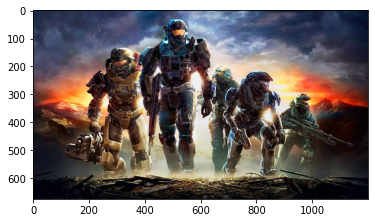

In [15]:
plt.imshow(img)
plt.show()

In [16]:
def reconstruct(img, k):
    reconstructed = np.zeros(img.shape)
    for i in range(img.shape[2]):
        U, Sigma, V_transpose = np.linalg.svd(img[:, :, i])
        reconstructed[:, :, i] = U[:, :k] @ np.diag(Sigma[:k]) @ V_transpose[:k, :]
    return reconstructed

In [17]:
reconstructed = reconstruct(img, k=1)

In [18]:
def rescale_img(img):
    rescaled = (img - img.min()) / (img.max() - img.min())
    return rescaled

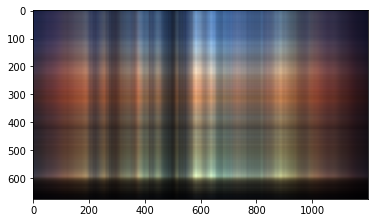

In [19]:
plt.imshow(rescale_img(reconstructed))
plt.show()

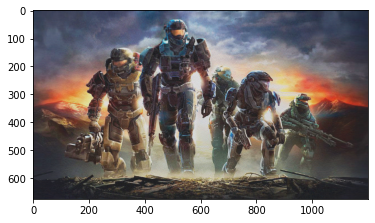

In [22]:
reconstructed = reconstruct(img, k=200)
plt.imshow(rescale_img(reconstructed))
plt.show()

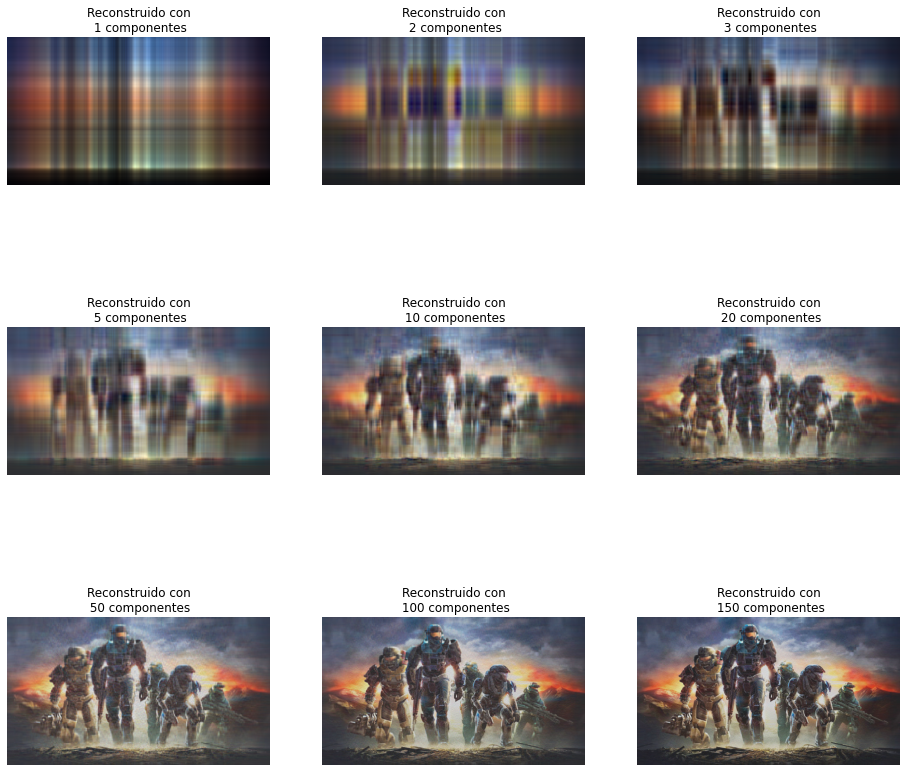

In [23]:
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
f.subplots_adjust(hspace=0)

n_components = [1, 2, 3, 5, 10, 20, 50, 100,150]

count = 0
for ax, n_component in zip(axes.flatten(), n_components):
    reconstructed = reconstruct(img, k=n_component)
    ax.axis('off')
    ax.imshow(rescale_img(reconstructed))
    ax.set_title(f"Reconstruido con\n {n_component} componentes")
    
    count += 1

plt.show()

# Punto 6 
Realiza un análisis a partir de los conocimientos matemáticos recordados durante el módulo y determina cuáles de estos se necesitan poner en práctica para solucionar una problemática como la planteada en el punto 2.

Para realizar el caso de uno del punto numero 2 se debe tener conocimiento en algebra lineal, pues vamos a estar manenjando imagenes que en ambito profesional son represantando con matrices, y teniendo este conocimiento podemos manipular, tambien en el ambito estadistico para para poder hacer un analisis predictivo de formma correcta.